In [27]:
import torch
import torch.nn as nn
from torchinfo import summary
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
from torchvision.transforms import v2
import torchvision.models as models
from PIL import Image
from torch.utils.data import DataLoader,Dataset         #데이터셋 관련 모듈
import torch.optim as optim
from sklearn.metrics import accuracy_score, f1_score
import torch.optim.lr_scheduler as lr_scheduler


In [28]:
train_dir='./data/train1/'
test_dir='./data/test1/'

In [29]:
transform = v2.Compose(
    [
    v2.Resize([224,224]),
    v2.RandomResizedCrop(224),
    v2.ToImage(),
    v2.ConvertImageDtype(torch.float),
    v2.Normalize(mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225]),
    v2.ToDtype(torch.uint8, scale=True)
    ]
)

In [30]:
train_ds=ImageFolder(root=train_dir,transform=transform)
train_dl=DataLoader(train_ds,batch_size=32,shuffle=True)

In [31]:
test_ds=ImageFolder(root=test_dir,transform=transform)
test_dl=DataLoader(test_ds,batch_size=32,shuffle=True)

In [32]:
print(f'train_ds.classes       : {train_ds.classes}')
print(f'train_ds.class_to_idx  : {train_ds.class_to_idx}')
print(f'train_ds.targets       : {train_ds.targets}')
for img in train_ds.imgs:
    print(f'train_ds.imgs       : {img}')

train_ds.classes       : ['0', '1']
train_ds.class_to_idx  : {'0': 0, '1': 1}
train_ds.targets       : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

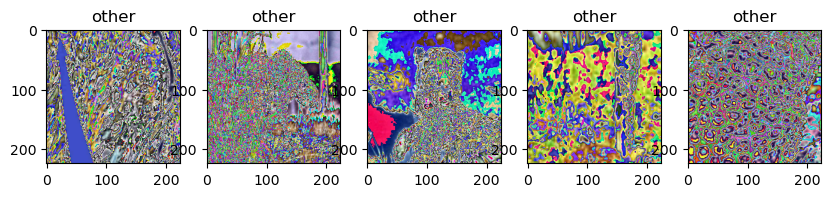

In [33]:
label_names=train_ds.classes
classes={0:'other', 1:'LION'}
fig,axes=plt.subplots(1,5,figsize=(10,4))
for idx,(img_data,target) in enumerate(train_ds):
    axes[idx].imshow(img_data.permute(1,2,0))
    axes[idx].set_title(classes[target])
    if idx==4: break
plt.show()

In [34]:
model=models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)

In [35]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [36]:
summary(model)

Layer (type:depth-idx)                   Param #
VGG                                      --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       1,792
│    └─ReLU: 2-2                         --
│    └─Conv2d: 2-3                       36,928
│    └─ReLU: 2-4                         --
│    └─MaxPool2d: 2-5                    --
│    └─Conv2d: 2-6                       73,856
│    └─ReLU: 2-7                         --
│    └─Conv2d: 2-8                       147,584
│    └─ReLU: 2-9                         --
│    └─MaxPool2d: 2-10                   --
│    └─Conv2d: 2-11                      295,168
│    └─ReLU: 2-12                        --
│    └─Conv2d: 2-13                      590,080
│    └─ReLU: 2-14                        --
│    └─Conv2d: 2-15                      590,080
│    └─ReLU: 2-16                        --
│    └─MaxPool2d: 2-17                   --
│    └─Conv2d: 2-18                      1,180,160
│    └─ReLU: 2-19                

In [37]:
for named,param in model.named_parameters():
    print(f'[{named}] - {param.shape}')
    
    param.requires_grad=False

[features.0.weight] - torch.Size([64, 3, 3, 3])
[features.0.bias] - torch.Size([64])
[features.2.weight] - torch.Size([64, 64, 3, 3])
[features.2.bias] - torch.Size([64])
[features.5.weight] - torch.Size([128, 64, 3, 3])
[features.5.bias] - torch.Size([128])
[features.7.weight] - torch.Size([128, 128, 3, 3])
[features.7.bias] - torch.Size([128])
[features.10.weight] - torch.Size([256, 128, 3, 3])
[features.10.bias] - torch.Size([256])
[features.12.weight] - torch.Size([256, 256, 3, 3])
[features.12.bias] - torch.Size([256])
[features.14.weight] - torch.Size([256, 256, 3, 3])
[features.14.bias] - torch.Size([256])
[features.17.weight] - torch.Size([512, 256, 3, 3])
[features.17.bias] - torch.Size([512])
[features.19.weight] - torch.Size([512, 512, 3, 3])
[features.19.bias] - torch.Size([512])
[features.21.weight] - torch.Size([512, 512, 3, 3])
[features.21.bias] - torch.Size([512])
[features.24.weight] - torch.Size([512, 512, 3, 3])
[features.24.bias] - torch.Size([512])
[features.26.we

In [38]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [39]:
class VGG16WithFC(nn.Module):
    def __init__(self):
        super(VGG16WithFC, self).__init__()

        self.vgg16 = models.vgg16(pretrained=True)

        self.features=model.features
        self.avgpool=model.avgpool
        self.classifier = self.vgg16.classifier

        self.extra_fc = nn.Sequential(
            nn.ReLU(),
            nn.Linear(1000,500),
            nn.ReLU(),
            nn.Linear(500,1)
        )

    def forward(self, x):
        x = self.features(x) 
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)  
        x = self.extra_fc(x)  
        return x

In [40]:
DEVICE='cuda' if torch.cuda.is_available else 'cpu'

In [41]:
model = VGG16WithFC()

c:\Users\DELL-PC\.conda\envs\EXAM_DL\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\DELL-PC\.conda\envs\EXAM_DL\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [42]:
print(model)

VGG16WithFC(
  (vgg16): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      (1

In [43]:
criterion=nn.BCEWithLogitsLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)
scheduler=lr_scheduler.ReduceLROnPlateau(optimizer,mode='max',patience=10,verbose=True)

c:\Users\DELL-PC\.conda\envs\EXAM_DL\lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [44]:
param_to_update=[]
for name, param in model.named_parameters():
    if param.requires_grad==True:
        param_to_update.append(param)

optimizer=optim.Adam(param_to_update,lr=0.001)

In [45]:
## models 폴더 아래 프로젝트 폴더 아래 모델 파일저장
import os

# 저장 경로
SAVE_PATH = './models/'
# 저장 파일명
SAVE_FILE = 'lion_model_train_wbs.pth'
# 저장 모델구조 및 파라미터 모두 저장
SAVE_MODEL = 'lion_model_all.pth'

if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

In [46]:
for feature,target in train_dl:
    print(feature.shape,target.shape)
    break


torch.Size([32, 3, 224, 224]) torch.Size([32])


In [48]:
model.to(DEVICE)

epochs=100
loss_history=[]
score_history=[]

for epoch in range(epochs):
    model.train()
    
    epoch_loss=0
    train_pred=[]
    train_true=[]

    for features,targets in train_dl:

        features=features.to(DEVICE)
        targets=targets.to(DEVICE)

        optimizer.zero_grad()

        outputs=model(features.float())
        predicted=torch.round(torch.sigmoid(outputs))
        loss=criterion(outputs,targets.float().view(-1,1)).to(DEVICE)

        loss.backward()
        optimizer.step()

        epoch_loss+=loss.item()
        
        train_pred.extend(predicted.detach().cpu().numpy())
        train_true.extend(targets.detach().cpu().numpy())

    train_f1=f1_score(train_true,train_pred)
    avg_loss_train=epoch_loss/len(train_dl)

    print(f'EPOCH [{epoch+1}/{epochs}]')
    print(f'[TRAIN] Loss: {avg_loss_train}, Score: {train_f1}')

    loss_history.append(avg_loss_train)
    score_history.append(train_f1)

    #최적화 스케줄러
    scheduler.step(loss)
    print()
    print(f'scheduler.num_bad_epochs: {scheduler.num_bad_epochs}',end=' ')
    print(f'scheduler.patience: {scheduler.patience}')
    print()

    if len(score_history) == 1:

        # 첫번째라서 무조건 모델 파라미터 저장
        torch.save(model.state_dict(),SAVE_PATH+SAVE_FILE)

        # 모델 전체 저장
        torch.save(model,SAVE_PATH+SAVE_MODEL)

    else:
        if score_history[-1] >= max(score_history):
            torch.save(model.state_dict(),SAVE_PATH+SAVE_FILE)
            # 모델 전체 저장
            torch.save(model,SAVE_PATH+SAVE_MODEL)

    #손실 감소(성능 개선) 안 되는 경우 조기 종료
    if scheduler.num_bad_epochs >= scheduler.patience:
        print()
        print(f'{scheduler.patience} EPOCH 성능 개선 없어서 조기 종료')
        break

#테스트
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for features, targets in test_dl:

        features=features.to(DEVICE)
        targets=targets.to(DEVICE)

        outputs=model(features.float())
        predicted = torch.round(torch.sigmoid(outputs))
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(targets.cpu().numpy())

# 성능 지표 계산
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')


c:\Users\DELL-PC\.conda\envs\EXAM_DL\lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


EPOCH [1/100]
[TRAIN] Loss: 0.5118164810396376, Score: 0.8080229226361031

scheduler.num_bad_epochs: 0 scheduler.patience: 10



c:\Users\DELL-PC\.conda\envs\EXAM_DL\lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


EPOCH [2/100]
[TRAIN] Loss: 0.5641509081636157, Score: 0.7638036809815951

scheduler.num_bad_epochs: 1 scheduler.patience: 10



c:\Users\DELL-PC\.conda\envs\EXAM_DL\lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


EPOCH [3/100]
[TRAIN] Loss: 0.43884707372339943, Score: 0.8156779661016949

scheduler.num_bad_epochs: 2 scheduler.patience: 10



c:\Users\DELL-PC\.conda\envs\EXAM_DL\lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


EPOCH [4/100]
[TRAIN] Loss: 0.3914730019039578, Score: 0.858987090367428

scheduler.num_bad_epochs: 3 scheduler.patience: 10



c:\Users\DELL-PC\.conda\envs\EXAM_DL\lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


EPOCH [5/100]
[TRAIN] Loss: 0.5859946830878182, Score: 0.7801350048216009

scheduler.num_bad_epochs: 4 scheduler.patience: 10



c:\Users\DELL-PC\.conda\envs\EXAM_DL\lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


EPOCH [6/100]
[TRAIN] Loss: 0.5269219447222967, Score: 0.7187153931339978

scheduler.num_bad_epochs: 5 scheduler.patience: 10



c:\Users\DELL-PC\.conda\envs\EXAM_DL\lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


EPOCH [7/100]
[TRAIN] Loss: 0.8753715280502562, Score: 0.17305976806422838

scheduler.num_bad_epochs: 6 scheduler.patience: 10



c:\Users\DELL-PC\.conda\envs\EXAM_DL\lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


EPOCH [8/100]
[TRAIN] Loss: 0.6063153833623917, Score: 0.0

scheduler.num_bad_epochs: 7 scheduler.patience: 10



c:\Users\DELL-PC\.conda\envs\EXAM_DL\lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


EPOCH [9/100]
[TRAIN] Loss: 0.5672219036117433, Score: 0.7862006354970495

scheduler.num_bad_epochs: 8 scheduler.patience: 10



c:\Users\DELL-PC\.conda\envs\EXAM_DL\lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


EPOCH [10/100]
[TRAIN] Loss: 0.5308982819791824, Score: 0.842508377213978

scheduler.num_bad_epochs: 9 scheduler.patience: 10



c:\Users\DELL-PC\.conda\envs\EXAM_DL\lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


EPOCH [11/100]
[TRAIN] Loss: 0.4967716984332554, Score: 0.8468208092485549

scheduler.num_bad_epochs: 10 scheduler.patience: 10


10 EPOCH 성능 개선 없어서 조기 종료
Accuracy: 0.7232
F1 Score: 0.7156


In [ ]:
x_test=[]
y_test=[]

for img, label in test_ds:
    x_test.append(img)
    y_test.append(label)

x_test=torch.stack(x_test)
y_test=torch.Tensor(y_test)


In [ ]:
fig = plt.figure(figsize=(25, 25))
for idx in range(20):
    axes=fig.add_subplot(5,4,idx+1,xticks=[],yticks=[])
    plt.imshow(x_test[idx].permute(1, 2, 0))
    axes.set_title(name[int(predicted[idx].item())])

plt.tight_layout()
plt.show()